# **Trabalho de Linguagem de Programação Aplicada - Análise de Preços de Carros no Brasil**

Este notebook contém a análise exploratória, visualização de dados e aplicação de modelos de machine learning na base `precos_carros_brasil.csv`, referente aos preços médios de carros no Brasil no ano de 2021.

---
## **1. Análise Exploratória dos Dados**
Nesta seção, realizaremos a análise inicial da base para entender sua estrutura e qualidade.

### **1.1 Carregamento dos Dados**
Carregamos a base `precos_carros_brasil.csv` e visualizamos suas primeiras linhas.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('precos_carros_brasil.csv')
data.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


### **1.2 Tratamento de Valores Faltantes**
Verificamos se há valores ausentes e aplicamos uma estratégia para tratá-los.

In [8]:
data.isna().any()
data.isna().sum()
## Delete rows with missing values
#data.dropna(inplace=True)

year_of_reference     0
month_of_reference    0
fipe_code             0
authentication        0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
dtype: int64

### **1.3 Identificação de Dados Duplicados**
Detectamos e removemos, se necessário, registros duplicados.

In [13]:
# Código para identificar e remover duplicatas
data.duplicated().sum()
## Mostra as linhas duplicadas
data[data.duplicated()]

## Remove duplicates
data.drop_duplicates(inplace=True)

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl


### **1.4 Classificação de Variáveis**
Separamos as colunas entre numéricas e categóricas e geramos estatísticas descritivas.

In [15]:
# Código para classificar variáveis e exibir estatísticas descritivas
numericas = data.select_dtypes(include=['float64', 'int64'])
categoricas = data.select_dtypes(include=['object'])

numericas.describe()
categoricas.describe()

,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size
count,202295,202295,202295,202295,202295,202295,202295,202295
unique,12,2091,202295,6,2112,3,2,29
top,January,001216-5,7hbnjmj9z5dqw,Fiat,Palio Week. Adv/Adv TRYON 1.8 mpi Flex,Gasoline,manual,"1,6"
freq,24260,425,1,44962,425,168684,161883,47420


### **1.5 Distribuição das Variáveis Categóricas**
Contamos quantas ocorrências há para cada modelo e marca de carro.

<Axes: xlabel='model'>

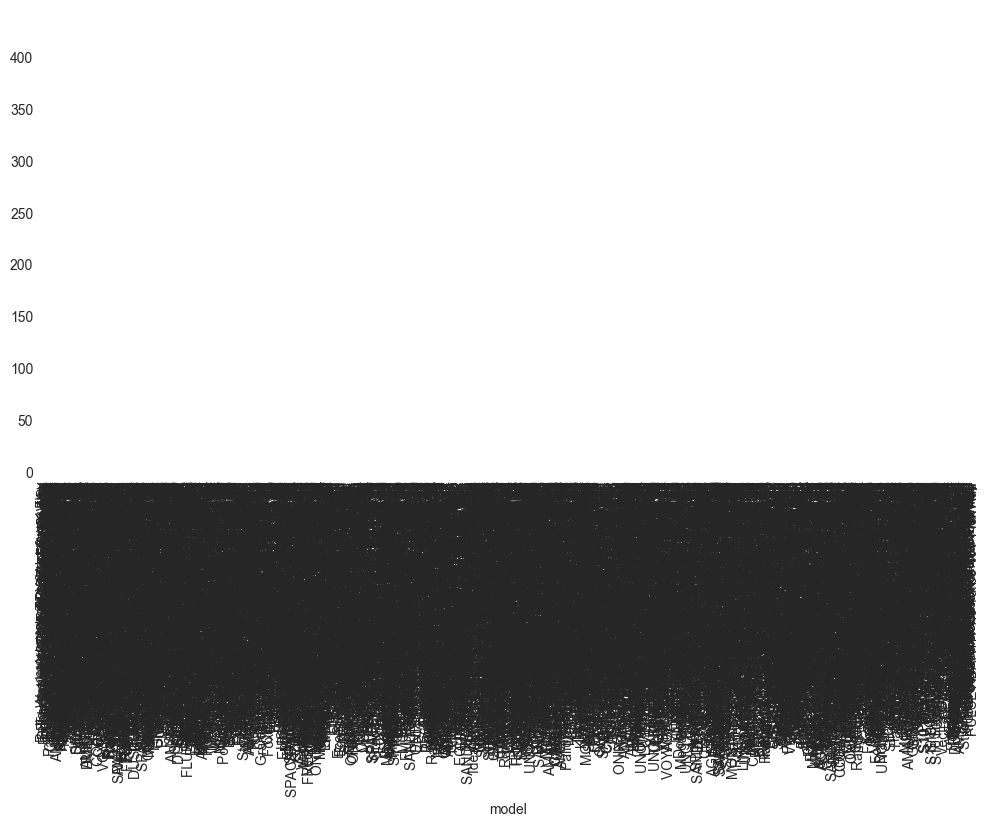

In [18]:
# Código para contar valores por modelo e marca
data['model'].value_counts()
data['brand'].value_counts()

# dataframes com a contagem de valores
model_counts = data['model'].value_counts().reset_index()
brand_counts = data['brand'].value_counts().reset_index()


### **1.6 Resumo dos Resultados**
Breve explicação sobre os principais insights da análise exploratória.

In [ ]:
# Código para exibir um resumo dos insights (opcional)

---
## **2. Visualização dos Dados**

### **2.1 Distribuição da Quantidade de Carros por Marca**
Geramos um gráfico para visualizar a quantidade de registros por marca.

In [ ]:
# Código para gerar gráfico de barras das marcas

### **2.2 Distribuição da Quantidade de Carros por Tipo de Engrenagem**
Visualizamos a distribuição dos diferentes tipos de engrenagem (`gear`).

In [ ]:
# Código para gráfico de engrenagem

### **2.3 Evolução da Média de Preços ao Longo dos Meses de 2022**
Geramos um gráfico para observar a variação dos preços ao longo do tempo.

In [ ]:
# Código para gráfico de linha da evolução dos preços

### **2.4 Distribuição da Média de Preços por Marca e Tipo de Engrenagem**
Criamos um gráfico para analisar essa relação e escrevemos uma breve explicação sobre os padrões observados.

In [ ]:
# Código para gráfico e análise

### **2.5 Distribuição da Média de Preços por Marca e Tipo de Combustível**
Criamos um gráfico para visualizar essa relação e escrevemos uma breve explicação sobre os padrões observados.

In [ ]:
# Código para gráfico e análise

## **3. Aplicação de Modelos de Machine Learning**

### **3.1 Seleção das Variáveis para Modelagem**
Escolhemos as variáveis numéricas e transformamos variáveis categóricas para usá-las no modelo.

In [ ]:
# Código para seleção e transformação de variáveis

### **3.2 Divisão dos Dados em Treino e Teste**
Separamos 75% dos dados para treino e 25% para teste.

In [ ]:
# Código para divisão dos dados

### **3.3 Treinamento dos Modelos**
Treinamos dois modelos de regressão para prever o preço médio dos carros:
- `RandomForestRegressor`
- `XGBRegressor`

In [ ]:
# Código para treinamento do Random Forest

In [ ]:
# Código para treinamento do XGBoost

### **3.4 Armazenamento das Predições**
Salvamos os valores previstos pelos modelos.

In [ ]:
# Código para armazenar as previsões

### **3.5 Importância das Variáveis**
Analisamos as variáveis mais relevantes para a predição do preço dos carros.

In [ ]:
# Código para análise da importância das variáveis

### **3.6 Escolha do Melhor Modelo**
Comparamos os modelos usando as métricas MSE, MAE e R².

In [ ]:
# Código para calcular e comparar métricas dos modelos

### **3.7 Resumo dos Resultados**
Breve explicação sobre qual modelo teve o melhor desempenho.

In [ ]:
# Código para exibir um resumo final dos resultados